In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from google.colab import drive
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

In [ ]:
drive.mount("/content/drive", force_remount=True)
train_samples_path = "/content/drive/Shareddrives/PokémonSerina/CNN_Train_Samples"
test_samples_path = "/content/drive/Shareddrives/PokémonSerina/CNN_Test_Samples"

Mounted at /content/drive


In [ ]:
def show_random_pokemon_image(target_dir, target_class):
  #Setup the target directory (we'll view images from here)
  target_folder = target_dir + "/" +  target_class
  random_image = random.sample(os.listdir(target_folder), 1) #Sample 1 item
  # print(random_image)

  #Read in  the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  # plt.title(target_class.split(".")[1])
  plt.title(target_class)
  plt.axis("off")
  # print(f"Image shape: {img.shape}")

  return img

In [ ]:
def data_augmenter():
    data_augmentation = tf.keras.Sequential()
    data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'))
    data_augmentation.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.2))
    
    return data_augmentation

In [ ]:
#Plot the validation and trining curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and evaluation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) #how many epochs we've ran

  #Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot loss
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
#re-config pred_and_polt
def pred_and_plot(model, img, class_names=class_names):
  """
  Imports an image located at filename, make a prediction with model
  and plots the image with the predicted class as the title
  """
  # img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  print(pred)

  #Add in logic for multiclass and get pred_class name
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
     pred_class = class_names[int(tf.round(pred[0]))]

  #Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [ ]:
len(os.listdir(train_samples_path))

3

In [ ]:
samples_folder = random.choice(os.listdir(train_samples_path))
train_path = train_samples_path + "/" + samples_folder
test_path = test_samples_path + "/" + samples_folder
# train_path = train_samples_path + "/" + "samples_1"
# test_path = test_samples_path + "/" + "samples_1"
pokemon_names = os.listdir(train_path)
print(train_path)
print(test_path)
print(pokemon_names)

/content/drive/Shareddrives/PokémonSerina/CNN_Train_Samples/samples_1
/content/drive/Shareddrives/PokémonSerina/CNN_Test_Samples/samples_1
['Ivysaur', 'Charmaleon', 'Primeape', 'Tentacool', 'Muk', 'MrMime', 'Ditto', 'Victreebell', 'Magnemite', 'Rapidash']


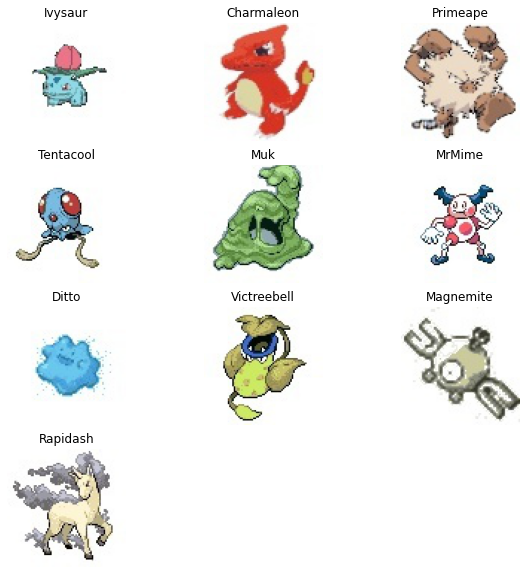

In [ ]:
plt.figure(figsize=(10,10))
pokemon_imgs = []
for i in range(len(pokemon_names)):
  plt.subplot(4, 3, i + 1)
  folder_name = pokemon_names[i]
  pokemon_img = show_random_pokemon_image(train_path, folder_name)

In [ ]:
class_names = sorted(pokemon_names)
class_names

['Charmaleon',
 'Ditto',
 'Ivysaur',
 'Magnemite',
 'MrMime',
 'Muk',
 'Primeape',
 'Rapidash',
 'Tentacool',
 'Victreebell']

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1 / 255., validation_split=0.2)
test_datagen = ImageDataGenerator(rescale = 1 / 255.)

In [ ]:
print("Training Data:")
train_data = train_datagen.flow_from_directory(directory=train_path,
                                               target_size=(256, 256),
                                               class_mode="categorical",
                                               batch_size=32,
                                               subset="training")
print("Validation Data:")
validation_data = train_datagen.flow_from_directory(directory=train_path,
                                                    target_size=(256, 256),
                                                    class_mode="categorical",
                                                    batch_size=32,
                                                    subset="validation")
print("Test Data:")
test_data = test_datagen.flow_from_directory(directory=test_path,
                                             target_size=(256, 256),
                                             class_mode="categorical",
                                             batch_size=32)

Training Data:
Found 408 images belonging to 10 classes.
Validation Data:
Found 98 images belonging to 10 classes.
Test Data:
Found 120 images belonging to 10 classes.


In [ ]:
len(train_data), len(validation_data), len(test_data)

(13, 4, 4)

Charmaleon


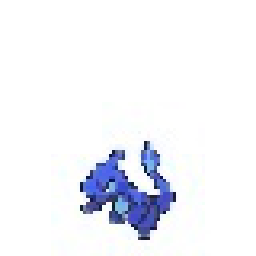

In [ ]:
images, labels = train_data.next()
print(class_names[tf.argmax(labels[0])])
cv2_imshow(images[0] * 255)

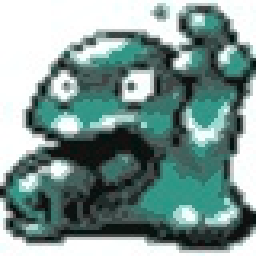

In [ ]:
cv2_imshow(train_data[0][0][0] * 255)

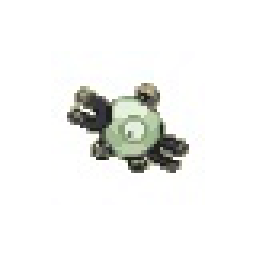

In [ ]:
cv2_imshow(validation_data[0][0][0] * 255)

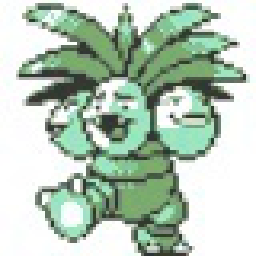

In [ ]:
cv2_imshow(test_data[0][0][0] * 255)

In [ ]:
tf.random.set_seed(42)
#Create a CNN model without data augmentation
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           padding="valid",
                           strides=1,
                           activation="relu",
                           input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 254, 254, 10)      280       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 127, 127, 10)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 125, 125, 10)      910       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 62, 62, 10)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 60, 60, 10)        910       
_________________________________________________________________
flatten_8 (Flatten)          (None, 36000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [ ]:
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history_1 = model_1.fit(train_data,
            epochs=10,
            steps_per_epoch=len(train_data),
            validation_data=validation_data,
            validation_steps=len(validation_data),
            callbacks=[callback])

Epoch 1/10
13/13 [==============================] - 2s 118ms/step - loss: 2.5632 - accuracy: 0.1520 - val_loss: 2.0710 - val_accuracy: 0.3571
Epoch 2/10
13/13 [==============================] - 1s 104ms/step - loss: 1.7791 - accuracy: 0.4559 - val_loss: 1.4705 - val_accuracy: 0.5612
Epoch 3/10
13/13 [==============================] - 1s 107ms/step - loss: 1.0589 - accuracy: 0.6838 - val_loss: 0.8748 - val_accuracy: 0.7449
Epoch 4/10
13/13 [==============================] - 1s 104ms/step - loss: 0.6527 - accuracy: 0.7868 - val_loss: 0.6996 - val_accuracy: 0.8061
Epoch 5/10
13/13 [==============================] - 1s 104ms/step - loss: 0.3357 - accuracy: 0.9167 - val_loss: 0.4940 - val_accuracy: 0.8469
Epoch 6/10
13/13 [==============================] - 1s 102ms/step - loss: 0.1858 - accuracy: 0.9559 - val_loss: 0.4645 - val_accuracy: 0.8571
Epoch 7/10
13/13 [==============================] - 1s 96ms/step - loss: 0.1137 - accuracy: 0.9730 - val_loss: 0.5040 - val_accuracy: 0.8776
Epoch 8

In [ ]:
model_1.evaluate(test_data)

4/4 [==============================] - 0s 68ms/step - loss: 0.3967 - accuracy: 0.8833


[0.3967171609401703, 0.8833333253860474]

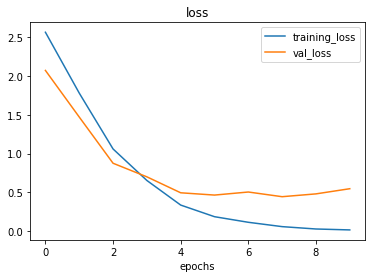

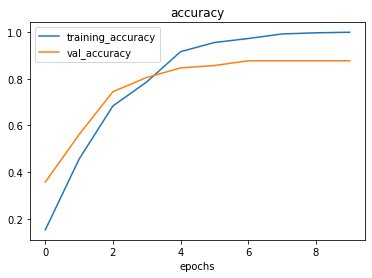

In [ ]:
plot_loss_curves(history_1)

[[6.7487555e-05 7.2011495e-08 1.0443430e-04 3.2372654e-06 9.9949634e-01
  2.9723009e-07 1.1507768e-05 2.5729786e-04 8.1589378e-06 5.1135419e-05]]


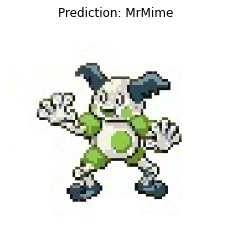

In [ ]:
index = random.randint(0, len(test_data[0][0]))
pred_and_plot(model_1, test_data[0][0][index], sorted(pokemon_names))

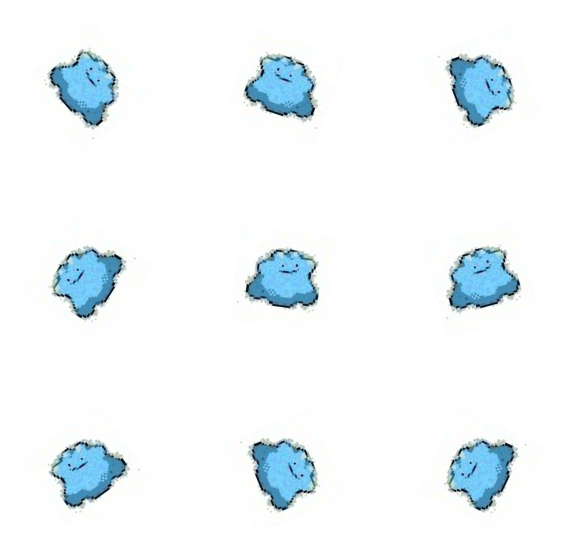

In [ ]:
data_augmentation = data_augmenter()
plt.figure(figsize=(10, 10))
images, _ = train_data.next()
for i in range(9):
  augmented_images = data_augmentation(images * 255.)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_images[1].numpy().astype("uint8"))
  plt.axis("off")

In [ ]:
tf.random.set_seed(42)
num_classes = len(class_names)
model_3 = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           padding="valid",
                           strides=1,
                           activation="relu",
                           input_shape=(256,256,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes, activation="softmax")
])

In [ ]:
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history_3 = model_3.fit(train_data,
                        epochs=20,
                        validation_data=validation_data,
                        steps_per_epoch=len(train_data),
                        validation_steps=len(validation_data),
                        callbacks=[callback])

Epoch 1/20
13/13 [==============================] - 2s 112ms/step - loss: 2.5456 - accuracy: 0.1299 - val_loss: 2.2409 - val_accuracy: 0.2449
Epoch 2/20
13/13 [==============================] - 1s 97ms/step - loss: 2.1710 - accuracy: 0.2721 - val_loss: 2.0460 - val_accuracy: 0.1837
Epoch 3/20
13/13 [==============================] - 1s 97ms/step - loss: 1.8720 - accuracy: 0.3186 - val_loss: 1.7542 - val_accuracy: 0.3571
Epoch 4/20
13/13 [==============================] - 1s 96ms/step - loss: 1.5562 - accuracy: 0.4608 - val_loss: 1.4754 - val_accuracy: 0.5102
Epoch 5/20
13/13 [==============================] - 1s 99ms/step - loss: 1.3533 - accuracy: 0.5245 - val_loss: 1.1849 - val_accuracy: 0.6122
Epoch 6/20
13/13 [==============================] - 1s 96ms/step - loss: 1.1477 - accuracy: 0.5907 - val_loss: 1.0463 - val_accuracy: 0.6531
Epoch 7/20
13/13 [==============================] - 1s 95ms/step - loss: 1.0134 - accuracy: 0.6740 - val_loss: 0.9490 - val_accuracy: 0.7449
Epoch 8/20
1

In [ ]:
model_3.evaluate(test_data)

4/4 [==============================] - 0s 76ms/step - loss: 0.6698 - accuracy: 0.7833


[0.6698349118232727, 0.7833333611488342]

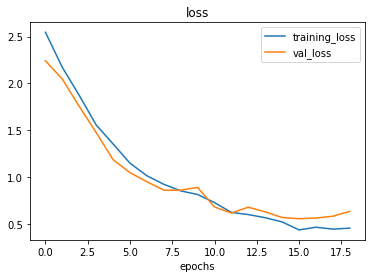

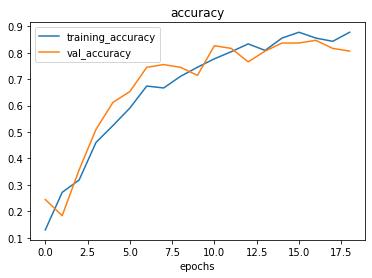

In [ ]:
plot_loss_curves(history_3)

[[3.00984502e-01 1.08185035e-04 2.15187250e-03 8.41304645e-05
  1.90618008e-01 1.60343916e-05 2.93809939e-02 5.07834181e-03
  8.68662173e-05 4.71491039e-01]]


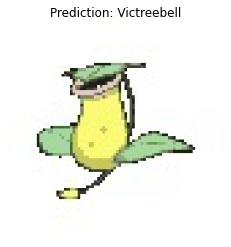

In [ ]:
index = random.randint(0, len(test_data[0][0]))
pred_and_plot(model_3, test_data[0][0][index], sorted(pokemon_names))